# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips['tips_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [2]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        19:10:30   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.5)

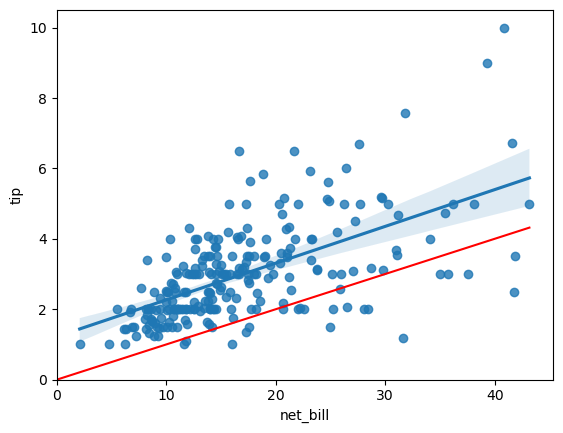

In [3]:
sns.regplot(y='tip', x='net_bill', data=tips[tips['tips_pct'] < .5])

x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [4]:
reg_2 = smf.ols('tips_pct ~ net_bill', data=tips).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tips_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        19:10:30   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 1.0)

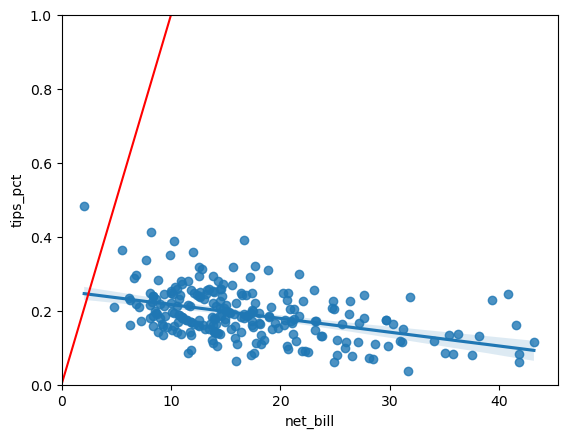

In [18]:
sns.regplot(y='tips_pct', x='net_bill', data=tips[tips['tips_pct'] < .5])

x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(0,1)


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

É perceptível uma oposição em relação aos dois gráficos, pois, enquanto o valor de **tip** tende a crescer juntamente com o valor de **net_bill**, o **tips_pct** tende a diminuir.

Não é possível comparar diretamente o R-squared dos dois, tendo em vista a discrepância dos valores.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 2, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [21]:
tips_split = tips[40:45]

pred = reg_2.predict(tips)
tips_split['tips_pct'] = pred
tips_split['tip'] = tips_split['tips_pct'] * tips_split['net_bill']

tips_split

C:\Users\Chrystian\AppData\Local\Temp\ipykernel_12244\3089748960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_split['tips_pct'] = pred
C:\Users\Chrystian\AppData\Local\Temp\ipykernel_12244\3089748960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_split['tip'] = tips_split['tips_pct'] * tips_split['net_bill']


,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
40,16.04,3.042693,Male,No,Sat,Dinner,3,0.220485,13.80
41,17.46,3.186938,Male,No,Sun,Dinner,2,0.213602,14.92
42,13.94,2.594126,Male,No,Sun,Dinner,2,0.238431,10.88
43,9.68,2.122755,Male,No,Sun,Dinner,2,0.253918,8.36
44,30.40,3.791461,Male,No,Sun,Dinner,4,0.152881,24.80


In [22]:
reg_3 = smf.ols('tip ~ net_bill', data=tips_split).fit()
reg_3.summary()

C:\Users\Chrystian\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     30.40
Date:                Wed, 17 Jan 2024   Prob (F-statistic):             0.0117
Time:                        19:33:35   Log-Likelihood:                 1.8041
No. Observations:                   5   AIC:                            0.3918
Df Residuals:                       3   BIC:                           -0.3894
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5556      0.271      5.749      0.010       0.694       2.417
net_bill       0.0957      0.017      5.513      0.012       0.040       0.151
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.747
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.519
Skew:                          -0.081   Prob(JB):                        0.771
Kurtosis:                       1.429   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        19:33:37   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""